In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [41]:
original = cv2.imread('rabbit.jpeg', 0)

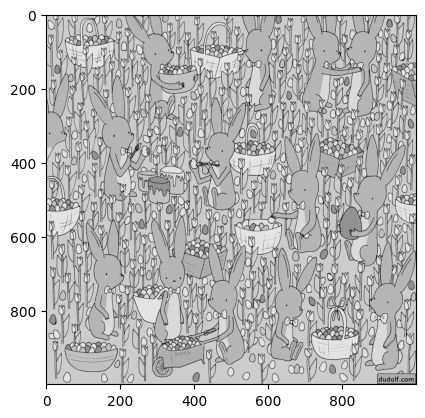

In [42]:
plt.imshow(original, cmap='gray')

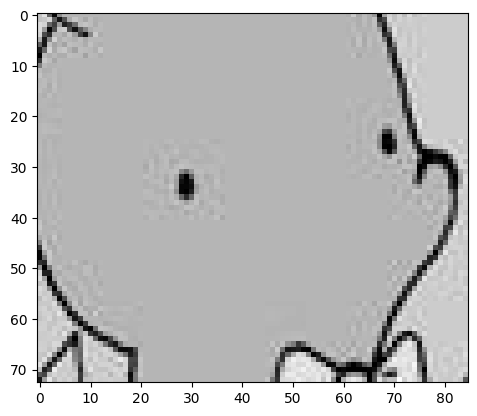

In [43]:
rabbit = original[295:368, 155:240]
plt.imshow(rabbit, cmap='gray')

array([[204, 137,  59, ..., 204, 204, 204],
       [207, 168,  82, ..., 204, 204, 204],
       [204,  48, 118, ..., 204, 204, 204],
       ...,
       [195,  49, 162, ..., 203, 206, 203],
       [115, 116, 216, ..., 205, 203, 203],
       [ 63, 210, 198, ..., 201, 207, 130]], dtype=uint8)
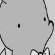

In [44]:
template= cv2.resize(rabbit, (55, 55))
template

In [45]:
def edge_detection(image):
    blur = cv2.GaussianBlur(image, (5,5), 0)
    edges = cv2.Canny(blur, 0, 50)
    return edges

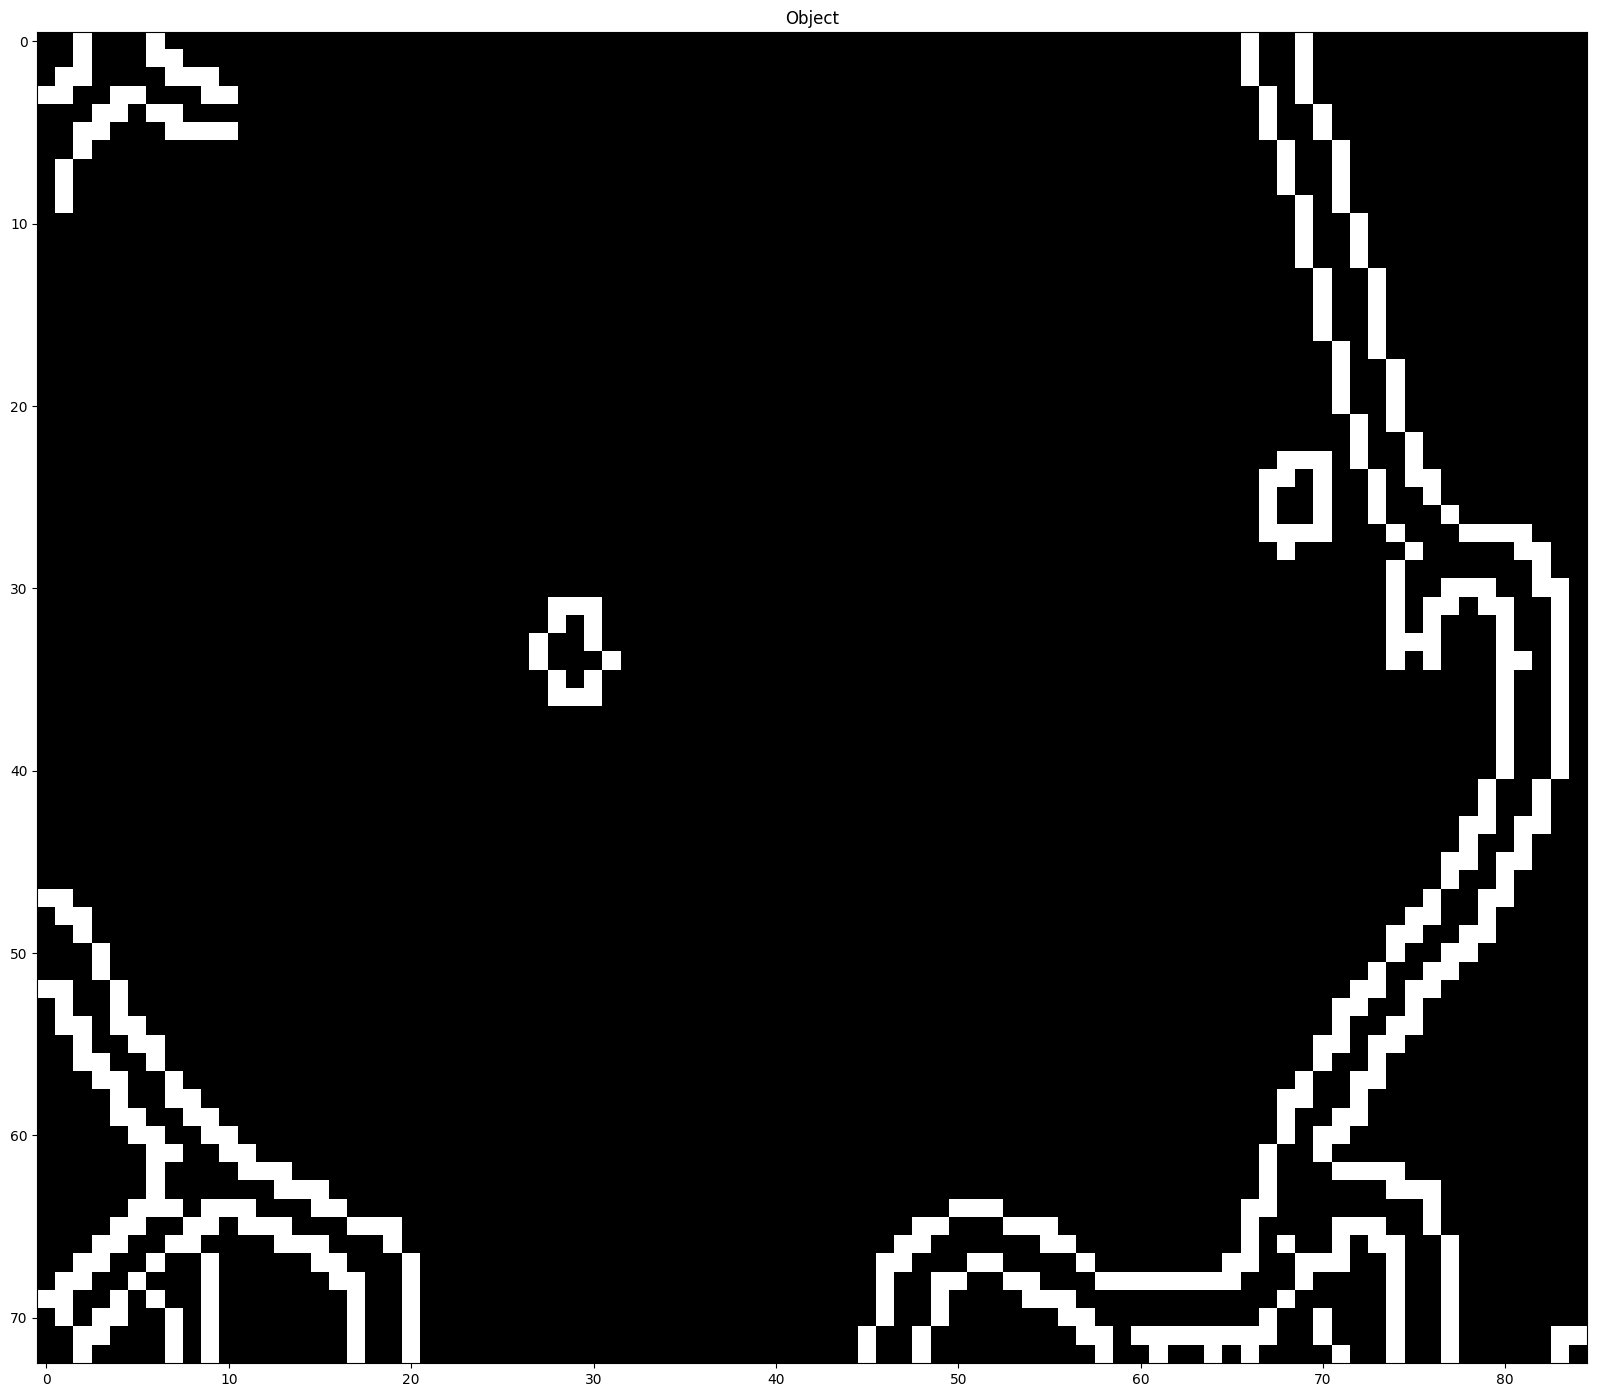

In [46]:

edge = edge_detection(rabbit)
plt.figure(figsize=(20, 20))
plt.imshow(edge, cmap='gray')
plt.title('Object')
plt.show()


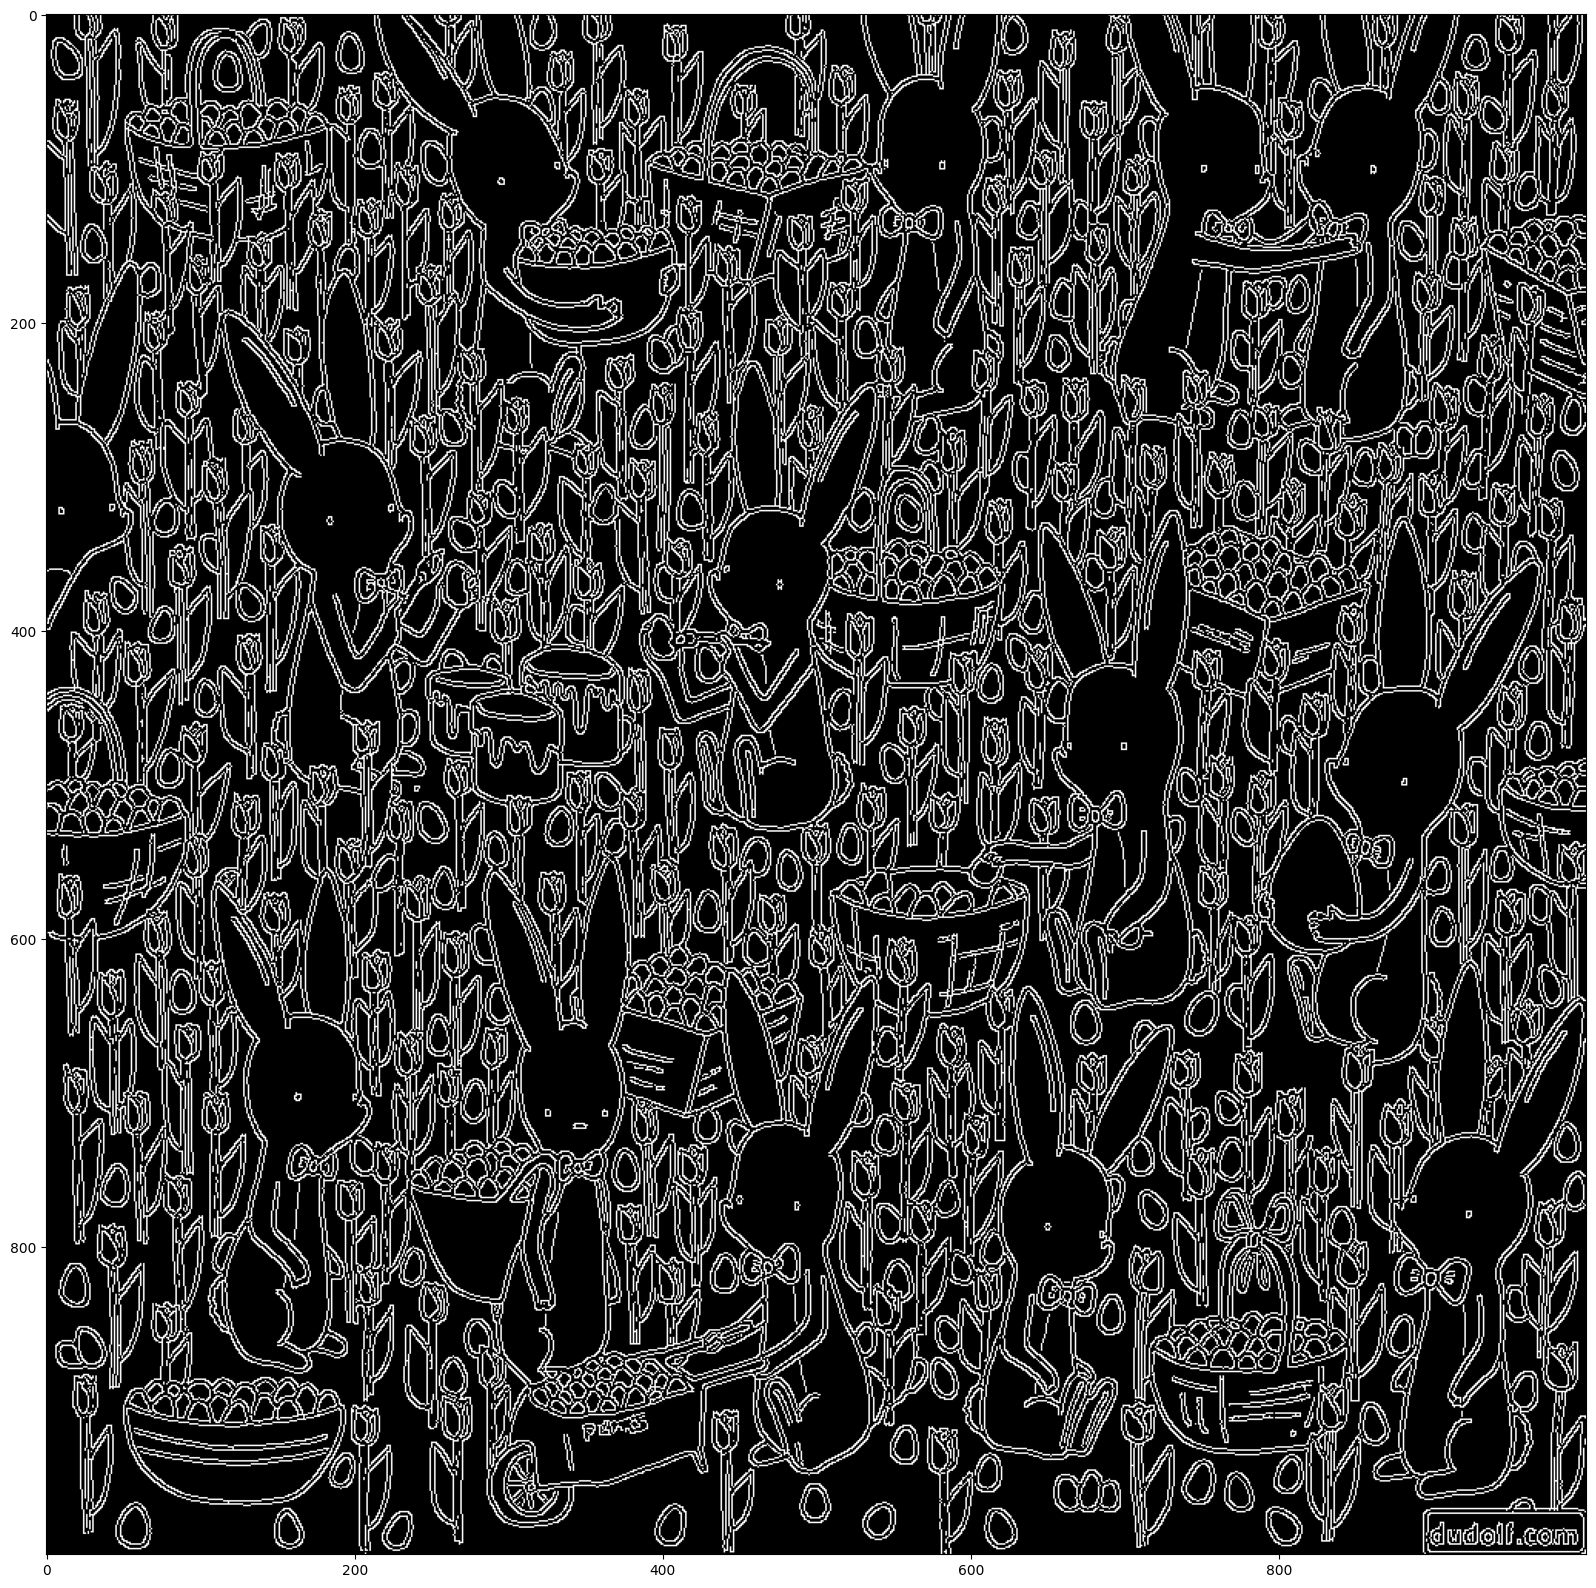

In [47]:
target_edges = edge_detection(original)
plt.figure(figsize=(20, 20))
plt.imshow(target_edges, cmap='gray', )

In [49]:
threshold = 0.2
scale_factors = np.linspace(0.8, 1.4, 100).tolist()
detections = []

for scale in scale_factors:

    scaled_template = cv2.resize(edge, None, fx=scale, fy=scale)

    res = cv2.matchTemplate(target_edges, scaled_template, cv2.TM_CCOEFF_NORMED)

    loc = np.where(res >= threshold)

    for pt in zip(*loc[::-1]):
        detections.append((pt[0], pt[1], scaled_template.shape[1], scaled_template.shape[0]))

def non_max_suppression(detections, overlapThresh):
    if len(detections) == 0:
        return []

    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in detections])

    pick = []

    x1 = rects[:, 0]
    y1 = rects[:, 1]
    x2 = rects[:, 2]
    y2 = rects[:, 3]
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)


        xx1 = np.maximum(x1[i], x1[idxs[:-1]])
        yy1 = np.maximum(y1[i], y1[idxs[:-1]])
        xx2 = np.minimum(x2[i], x2[idxs[:-1]])
        yy2 = np.minimum(y2[i], y2[idxs[:-1]])

        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        overlap = (w * h) / area[idxs[:-1]]

        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))

    return rects[pick].astype(int)

final_detections = non_max_suppression(detections, overlapThresh=0.1)

for (x1, y1, x2, y2) in final_detections:
    cv2.rectangle(target_edges, (x1, y1), (x2, y2), (255, 0, 0), 2)

print(f"Number of matches: {len(final_detections)}")

cv2.imwrite('detected_matches.jpg', target_edges)

Number of matches: 18


True

array([[  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       ...,
       [  0,   0,   0, ..., 255,   0, 255],
       [  0,   0,   0, ...,   0,   0, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)
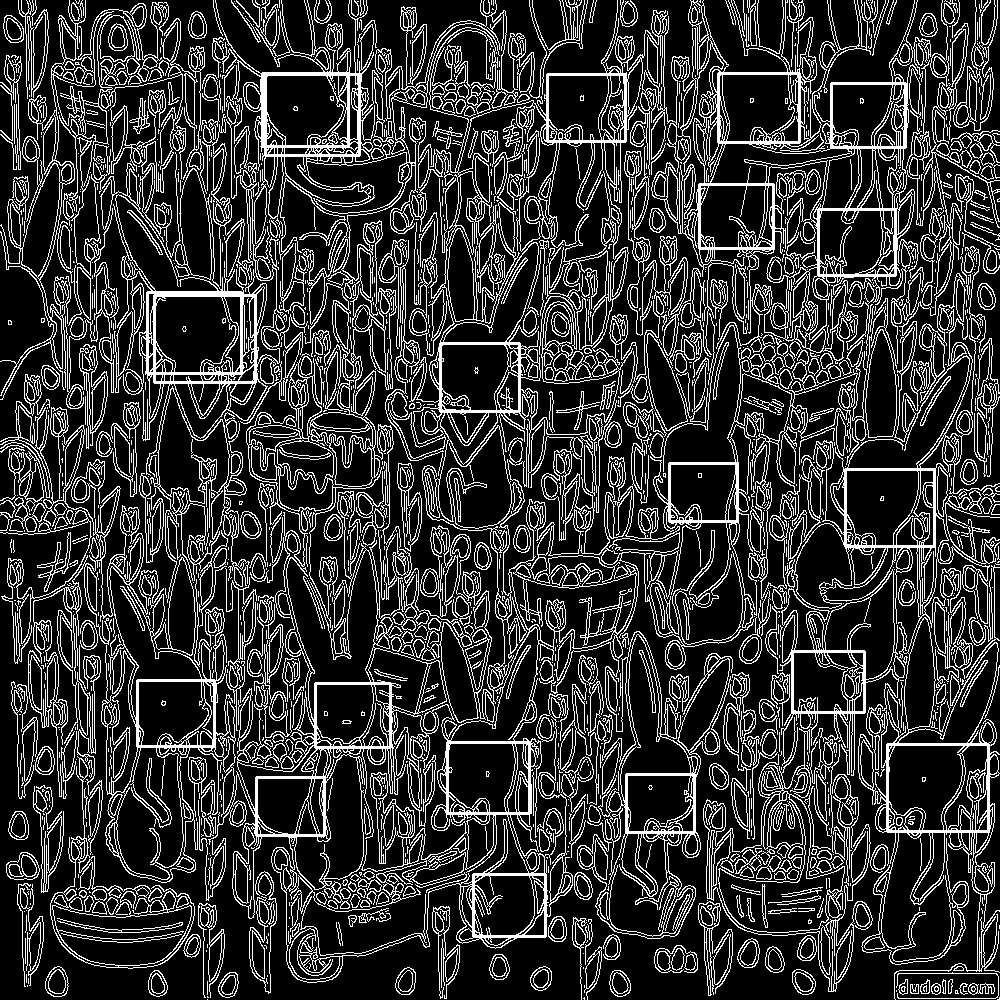

In [50]:
cv2.rectangle(target_edges, (x1, y1), (x2, y2), (255, 0, 0), 2)

In [51]:
for (x1, y1, x2, y2) in final_detections:
    cv2.rectangle(original, (x1, y1), (x2, y2), (0, 0, 0), 2)

array([[204, 204, 204, ..., 209, 208, 203],
       [204, 204, 204, ..., 210, 201, 198],
       [204, 204, 204, ..., 212, 200, 204],
       ...,
       [204, 204, 204, ..., 148,  35,  79],
       [204, 204, 204, ...,  41,  30, 160],
       [204, 204, 204, ...,  77, 164, 220]], dtype=uint8)
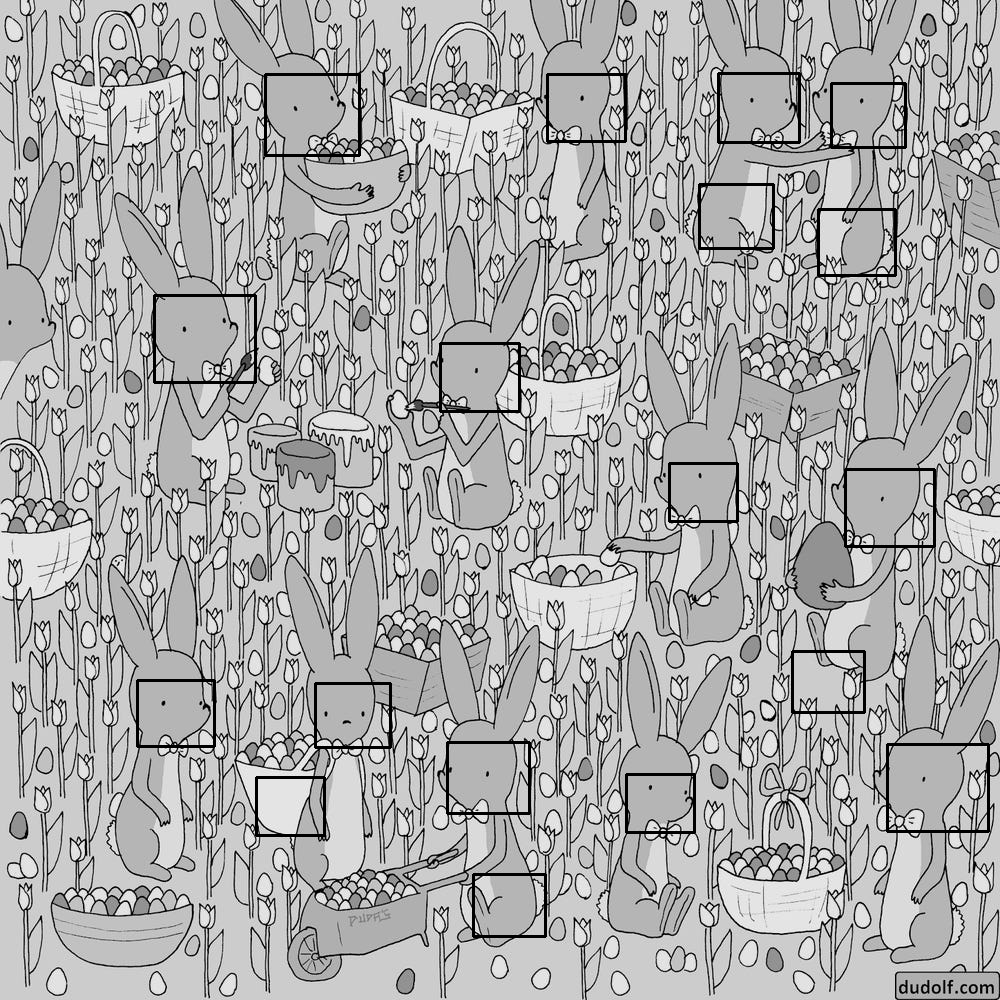

In [52]:
cv2.rectangle(original, (x1, y1), (x2, y2), (0, 0, 0), 2)